In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### New functions we will use in this module

| Function Name            | What it does |
| - | - |
|    numpy.random.randint  | generates a random integer |
|    numpy.random.uniform  | generates a random real number from a flat or 'uniform' distribution |
|    numpy.zeros           | makes an array and fills it with zeros |
|    numpy.arange          | makes an array and fills it with sequential integers e.g., [0, 1, 2, 3, ...] |
|    numpy.searchsorted    | find the index corresponding to the last entry in a sorted list that is less than particular value.  This can be used to find which "bin" a particular value belongs in. |
|    numpy.linsapce        | return evenly spaced values |
|    numpy.bincount        | count the number of values that fall in a set of bins |
|    numpy.histogram       | makes a "histogam" from a set of values, counting how many values fall into each of a set of bins. |
|    plt.plot              | Plots a series of values |  
|    plt.scatter           | Makes a "scatter" plot, plotting x and y values against each other |
|    plt.hist              | Makes a "histogram" plotting the number of values that fall into a set of bins |
|    plt.xlim              | Set the x-axis limits of a figure (also plt.ylim) |
|    plt.xlabel            | Set the x-axis label of a figure (also plt.ylabel) |  
|    array[i]              | Returns the i'th value in an array |  
|   value += increment     | Adds increment to a variable.  |

### Simulating a dice roll

This is a simple function to simulate rolling a normal, six-sided dice (or die).

np.random.randint(n) returns a random integer between 0 and n-1.  
Providing the size=nTimes argument simulates nTimes seperate rolls and puts them all in a data array.

In [2]:
def rollD6(nTimes):
    return np.random.randint(6, size=nTimes) + 1

In [3]:
tenRolls = rollD6(nTimes=10)
print(tenRolls)

[2 4 4 2 6 4 6 5 3 3]


## Counting Occurences 

One of the most common things to do with data is to count how many times something happened.

First, let's simulate rolling a dice 600 times.

In [4]:
dataSampleD6 = rollD6(nTimes=600)

Now, let's count the number of times we got each value.   Let's write a simple function to do this

In [5]:
def countDiceResults(data):
    counters = np.zeros((7), int)
    for value in data:
        counters[value] += 1
    return counters

In [6]:
countDiceResults(dataSampleD6)

array([  0,  94,  92, 115,  93, 107,  99])

#### pro-tip: numpy.bincount( )

The numpy.bincount function does the same thing as the function we wrote above, and it is smart enough to figure out
how many counters to use.

In [7]:
np.bincount(dataSampleD6)

array([  0,  94,  92, 115,  93, 107,  99])

### Representing the output

We are going to make a few plots to represent the results

First lets make a simple plot where we plot the value each roll of the dice

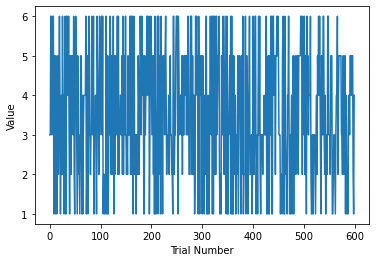

In [8]:
plt.plot(dataSampleD6)
plt.ylabel("Value")
_ = plt.xlabel("Trial Number")

## Questions for discussion:

2.1 Is this what you were expecting?

2.2 Can you think of a better way to represent the results?

### Next exercise, make a plot of the number of occurences of each value

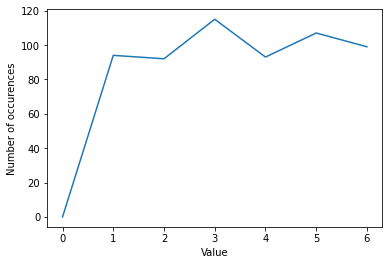

In [9]:
plt.plot(np.bincount(dataSampleD6))
plt.ylabel("Number of occurences")
_ = plt.xlabel("Value")

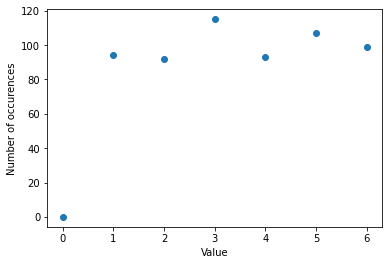

In [10]:
plt.scatter(np.arange(7), np.bincount(dataSampleD6))
plt.ylabel("Number of occurences")
_ = plt.xlabel("Value")

### Questions for discussion: 

#### 3.1 What do you think about how the data are presented in the previous two plots?

#### 3.2 How might they be presented more clearly?

# Histograms, bins, continuous data

In the example above we were counting discrete outcomes, (i.e., any one of the 6 possible outcomes of the dice roll).

But, a lot of times when we measure something, the outcomes are not discrete, but rather continous.  (E.g., your measurement can result in non-integer values)

In [11]:
dataSample = np.random.uniform(low=0., high=6., size=600)

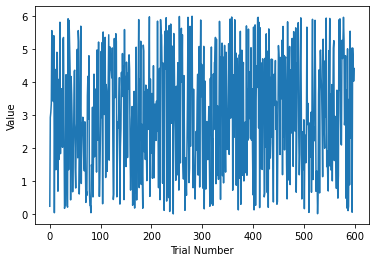

In [12]:
plt.plot(dataSample)
plt.ylabel("Value")
_ = plt.xlabel("Trial Number")

#### Histogram

A histogram is essentially chart that counts a number of occurences.  For discrete data, like a dice roll it counts the number of times each discrete outcome occurs.   For continous data, it counts the number of times the outcome was in a set of ranges.  We refer to those ranges as the histogram 'bins'

In [13]:
def countContinousResults(data, bins):
    indices = np.searchsorted(bins, data) - 1
    counters = np.zeros(len(bins)-1, int)
    for value in indices:
        counters[value] += 1
    return counters

#### Setting binning

We are going to use the numpy.linspace() function to define the bin edges.  
numpy.linspace(start, stop, num) returns `num` evenly spaced numbers between `start` and `stop`.

In [14]:
bins = np.linspace(0, 6, 7)
print(bins)

[0. 1. 2. 3. 4. 5. 6.]


Now lets count the number off items in each bin

In [15]:
countContinousResults(dataSample, bins)

array([ 98,  99, 106,  89, 108, 100])

#### numpy.histogram

The function `numpy.histogram` constructions a histogram of some data.  
Note: It also return the bins edges as well as the bin contents.

In [16]:
np.histogram(dataSample, bins=bins)

(array([ 98,  99, 106,  89, 108, 100]), array([0., 1., 2., 3., 4., 5., 6.]))

### Question for discussion: 

4.1 There are 6 items in the first array, but 7 items in the second.  Why?

#### matplotlib.hist

The matplotlib function `hist` will create and plot a histogram.

Note that it returns the bin content, bin edges, and some matplotlib
objects used to draw the figure. 

(array([ 98.,  99., 106.,  89., 108., 100.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 6 Patch objects>)

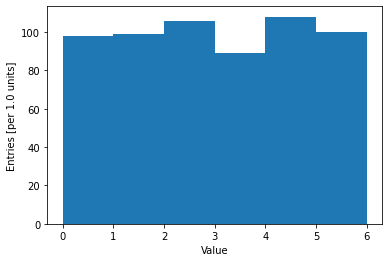

In [17]:
plt.xlabel("Value")
plt.ylabel("Entries [per 1.0 units]")
plt.hist(dataSample, bins=bins)

(array([52., 46., 56., 43., 45., 61., 41., 48., 53., 55., 48., 52.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 12 Patch objects>)

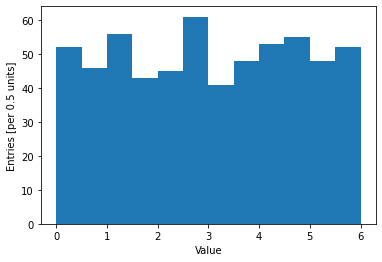

In [18]:
plt.xlabel("Value")
plt.ylabel("Entries [per 0.5 units]")
plt.hist(dataSample, bins=np.linspace(0, 6, 13))

Some things to note about histograms:

    1. The y-axis values depend on the bin widths.  Making the bins narrower will decrees the number of entries in each bin
    2. Because of this, it is good practice to include the bin width on the y-axis label
    3. Particularly when making a histogram of integer quantities you should be care to select the binning to avoid creating visual artifacts.  See the next few slides for examples

### Questions for discussion:

5.1 What are wrong with the next two histograms?

(array([  0.,  94.,  92., 115.,  93., 206.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 6 Patch objects>)

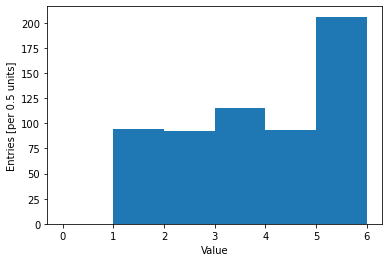

In [19]:
plt.xlabel("Value")
plt.ylabel("Entries [per 0.5 units]")
plt.hist(dataSampleD6, bins=bins)

(array([ 94.,  92., 208., 107.,  99.]),
 array([0.5, 1.7, 2.9, 4.1, 5.3, 6.5]),
 <a list of 5 Patch objects>)

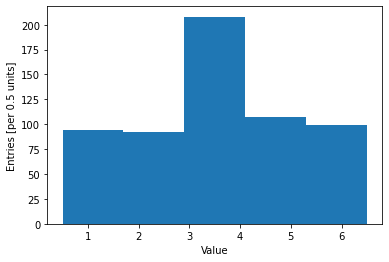

In [20]:
plt.xlabel("Value")
plt.ylabel("Entries [per 0.5 units]")
plt.hist(dataSampleD6, bins=np.linspace(0.5, 6.5, 6))

### Excercise:

E.1 Make a better version of the plot, explain what you did, and include details in your report.


(array([ 94.,  92., 115.,  93., 107.,  99.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

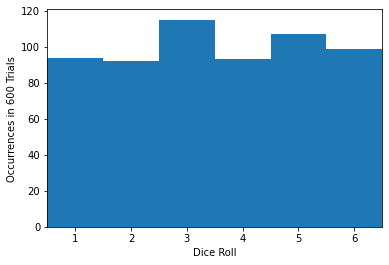

In [21]:
plt.xlim((0.5, 6.5))
plt.xlabel("Dice Roll")
plt.ylabel("Occurrences in 600 Trials")
plt.hist(dataSampleD6, bins=np.linspace(0.5, 6.5, 7))